In [1]:
#!pip install requests
#!pip install matplotlib
#!pip install pillow
#!pip install numpy

In [2]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import requests
from io import BytesIO


In [3]:
endpoints = {
    'ecotrust': 'https://arcgis.ecotrust.org/server/rest/services/Landmapper/Streams/MapServer',
    'satellite': 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer',
    'topo': 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer',
    'street': 'https://server.arcgisonline.com/arcgis/rest/services/World_Street_Map/MapServer'
}
map_size = 510
params = {
    #'BBOX': '-1.3803006309370652E7,5408329.32956264,-1.3797921517824095E7,5413018.435183838',
    #'BBOXSR': '102100',
    'BBOX': '-123.9945153,43.6297925,-123.9488379,43.660274',
    'BBOXSR': '4326',
    'LAYERS': 'show:0',
    'TRANSPARENT': 'true',
    'F': 'image',
    'FORMAT': 'PNG32',
    'DPI':"96",
    'SIZE':"{},{}".format(map_size, map_size),
    'IMAGESR':'3857'
}

plt_dpi=144

ecotrust_url = '/'.join([endpoints['ecotrust'], "export"])
ecotrust_pem = './staticfiles/arcgis-ecotrust-org.pem'

https://arcgis.ecotrust.org/server/rest/services/Landmapper/Streams/MapServer/export?BBOX=-123.9945153%2C43.6297925%2C-123.9488379%2C43.660274&BBOXSR=4326&LAYERS=show%3A0&TRANSPARENT=true&F=image&FORMAT=PNG32&DPI=96&SIZE=510%2C510&IMAGESR=3857


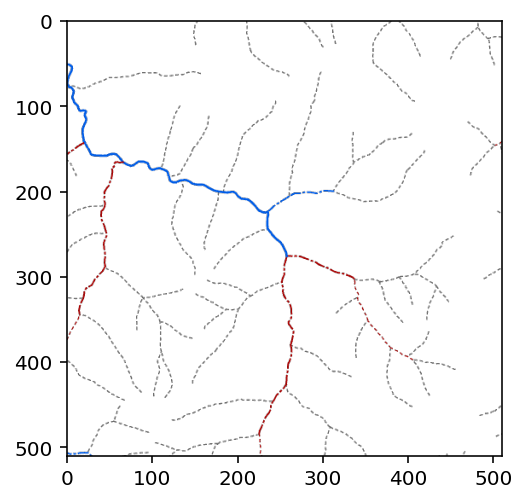

In [4]:
# From StackOverflow user Punnerud: https://stackoverflow.com/a/54744958

maptile = requests.get(ecotrust_url, params=params, verify=ecotrust_pem)
print(maptile.url)
stream_im = Image.open(BytesIO(maptile.content))
stream_im_array = np.asarray(stream_im)
plt.figure(dpi=plt_dpi)
plt.imshow(stream_im_array)
plt.show()

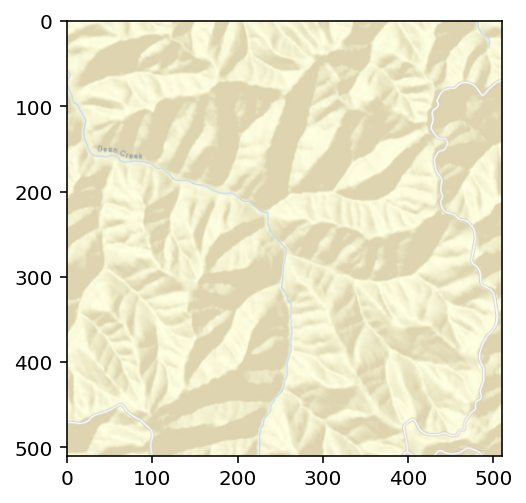

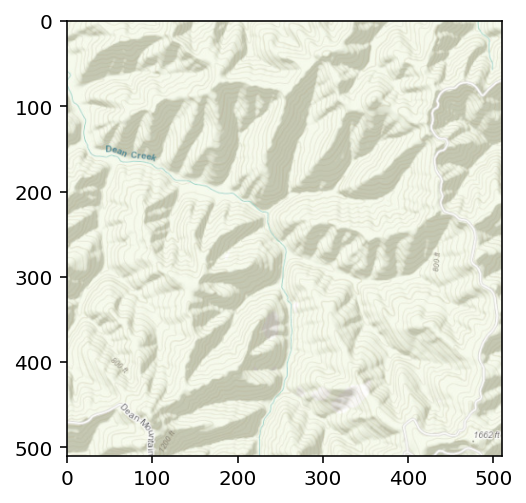

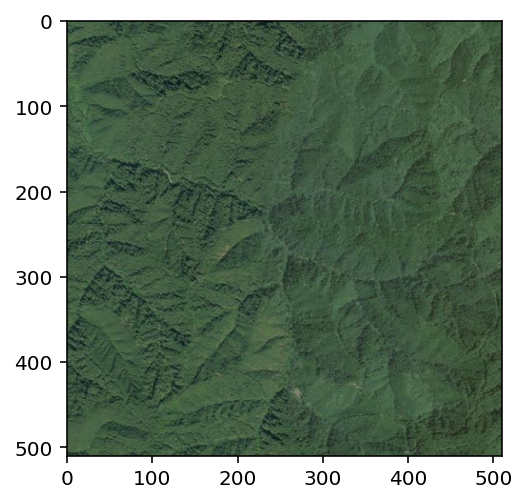

In [5]:
# Basemaps

streetTile = requests.get('/'.join([endpoints['street'], "export"]), params=params)
street_im = Image.open(BytesIO(streetTile.content))
street_im_array = np.asarray(street_im)
plt.figure(dpi=plt_dpi)
plt.imshow(street_im_array)
plt.show()

#TOPO
topoTile = requests.get('/'.join([endpoints['topo'], "export"]), params=params)
topo_im = Image.open(BytesIO(topoTile.content))
topo_im_array = np.asarray(topo_im)
plt.figure(dpi=plt_dpi)
plt.imshow(topo_im_array)
plt.show()

#Satellite
params['LAYERS'] = "show:2"
satTile = requests.get('/'.join([endpoints['satellite'], "export"]), params=params)
sat_im = Image.open(BytesIO(satTile.content))
sat_im_array = np.asarray(sat_im)
plt.figure(dpi=plt_dpi)
plt.imshow(sat_im_array)
plt.show()


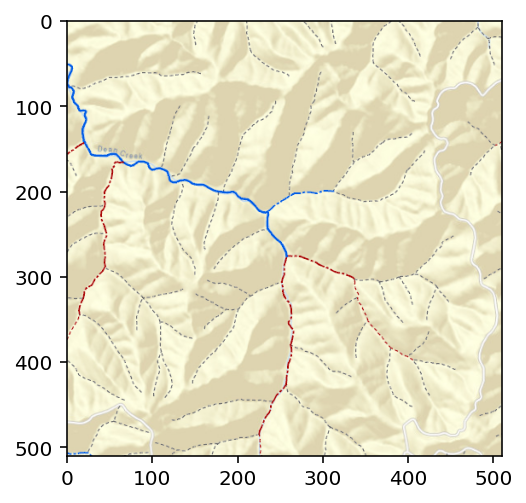

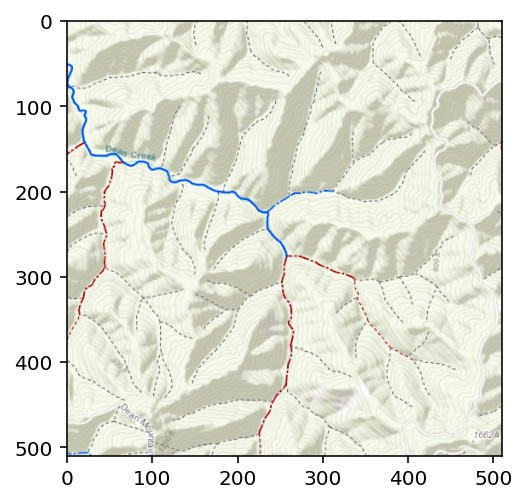

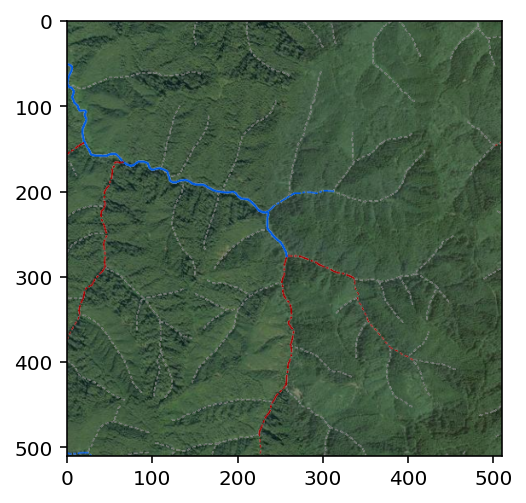

In [6]:
# Merge
street_map = street_im.copy()
street_map.paste(stream_im, (0,0), stream_im)
topo_map = topo_im.copy()
topo_map.paste(stream_im, (0,0), stream_im)
sat_map = sat_im.copy()
sat_map.paste(stream_im, (0,0), stream_im)
street_map_array = np.asarray(street_map)
topo_map_array = np.asarray(topo_map)
sat_map_array = np.asarray(sat_map)
plt.figure(dpi=plt_dpi)
plt.imshow(street_map_array)
plt.show()
plt.figure(dpi=plt_dpi)
plt.imshow(topo_map_array)
plt.show()
plt.figure(dpi=plt_dpi)
plt.imshow(sat_map_array)
plt.show()


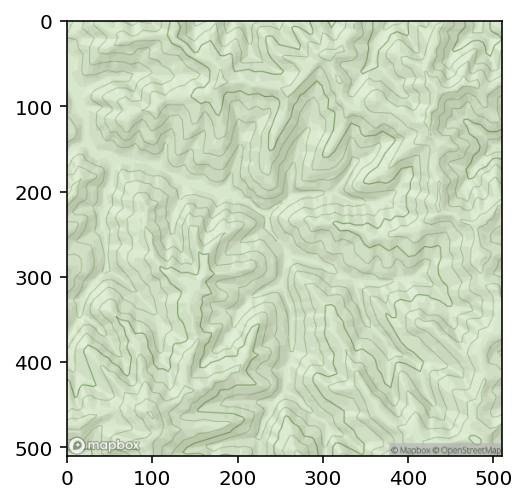

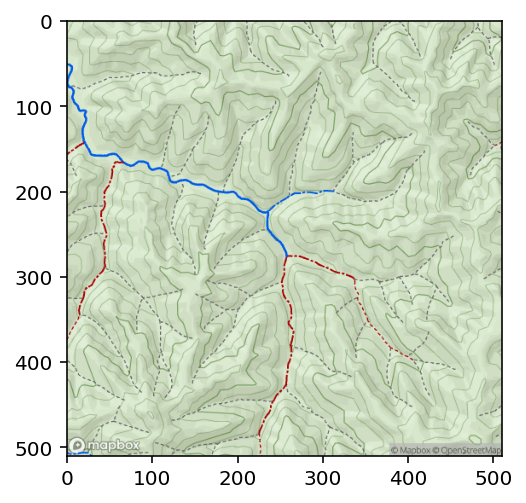

In [9]:
#Mapbox

from staticfiles.secret_settings import MAPBOX_TOKEN, MB_USERID, MB_LAYERID

# https://docs.mapbox.com/api/maps/static-images/
mbtopo_url = "https://api.mapbox.com/styles/v1/{}/{}/static/[{}]/{}".format(
    MB_USERID, MB_LAYERID, params['BBOX'],'x'.join(params['SIZE'].split(',')))
mbTopoTile = requests.get(mbtopo_url, params={'access_token': MAPBOX_TOKEN})
mbTopo_im = Image.open(BytesIO(mbTopoTile.content))
mbTopo_im = mbTopo_im.convert('RGB')
mbTopo_im_array = np.asarray(mbTopo_im)
plt.figure(dpi=plt_dpi)
plt.imshow(mbTopo_im_array)
plt.show()

mbTopo_map = mbTopo_im.copy()
mbTopo_map.paste(stream_im, (0,0), stream_im)
mbTopo_map_array = np.asarray(mbTopo_map)
plt.figure(dpi=plt_dpi)
plt.imshow(mbTopo_map_array)
plt.show()
